<a href="https://colab.research.google.com/github/saun09/Predicting-Heart-Diseases/blob/main/PredictingHeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn pandas matplotlib seaborn


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import joblib



In [6]:

path = "/content/heart_disease_uci.csv"

# Load dataset
df = pd.read_csv(path)
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
df.columns


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [10]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Missing values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol      

In [11]:
# Convert 'num' column (0–4) to binary: 0 = No disease, 1 = Disease
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop unnecessary columns
df.drop(columns=['id', 'dataset', 'num'], inplace=True)


In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


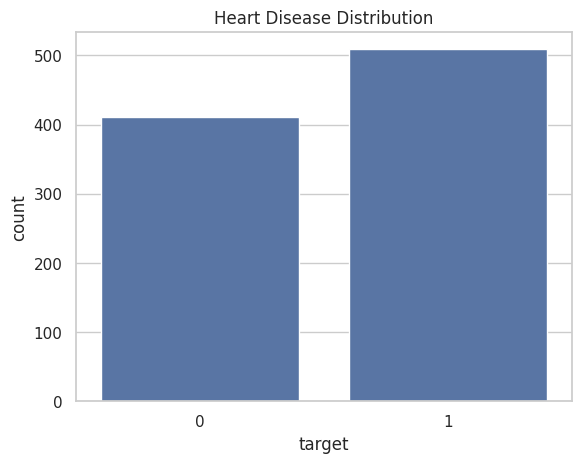

In [13]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()


In [18]:
# Separate features by type
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='target').columns.tolist()

# Imputation + Encoding for categorical
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', LabelEncoder())  # Will handle separately as LabelEncoder can't be used directly in pipelines
])
#can use oneHotencoder instead of LabelEncoder



# Imputation + Scaling for numerical
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,2,1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,3,1
3,37,1,2,130.0,250.0,0,2,187.0,0,3.5,0,0.0,2,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,3,0.0,2,0


In [20]:
for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = LabelEncoder().fit_transform(df[col])



In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,2,1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,3,1
3,37,1,2,130.0,250.0,0,2,187.0,0,3.5,0,0.0,2,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,3,0.0,2,0


In [22]:
X = df.drop('target', axis=1)
y = df['target']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
print("Missing values per column:\n", X.isnull().sum())


Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [76]:
from sklearn.impute import SimpleImputer

# Use mean for numerical imputation
imputer = SimpleImputer(strategy='mean')

# Fit and transform
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame
X = pd.DataFrame(X_imputed, columns=X.columns)

# Confirm no missing values
print("Missing values after imputation:\n", X.isnull().sum())


Missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [77]:
# Redo train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train models
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

for name, model in models.items():
    model.fit(X_train, y_train)
    joblib.dump(model, f"{name.replace(' ', '_').lower()}_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")




--- Logistic Regression ---

--- Decision Tree ---

--- KNN ---

--- SVM ---


['scaler.pkl']

In [78]:

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1-score:", f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.75
Precision: 0.7488943488943489
Recall: 0.7422285987565758
F1-score: 0.7440735365263668


In [79]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    # Predict class labels
    y_pred = model.predict(X_test)

    # If probability estimates are available
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = None

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(f"--- {model_name} - Classification Report ---")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f'{model_name} - ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.savefig(f"{model_name}_roc_curve.png")
        plt.legend()
        plt.show()

    # Precision-Recall Curve
    if y_prob is not None:
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        plt.figure()
        plt.plot(recall, precision)
        plt.title(f'{model_name} - Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.show()

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}")
    print(f"{model_name} Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"{model_name} Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"{model_name} F1 Score: {f1_score(y_test, y_pred):.4f}")


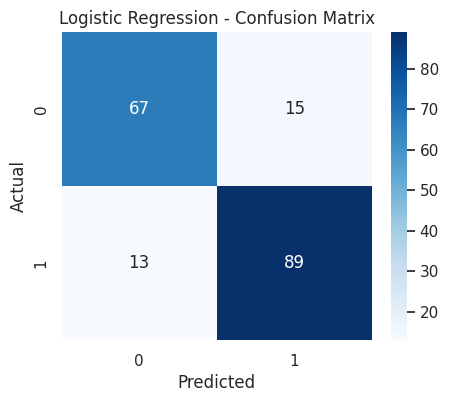

--- Logistic Regression - Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        82
           1       0.86      0.87      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



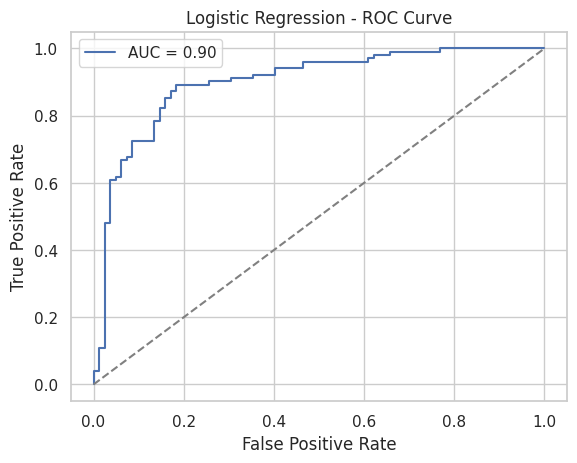

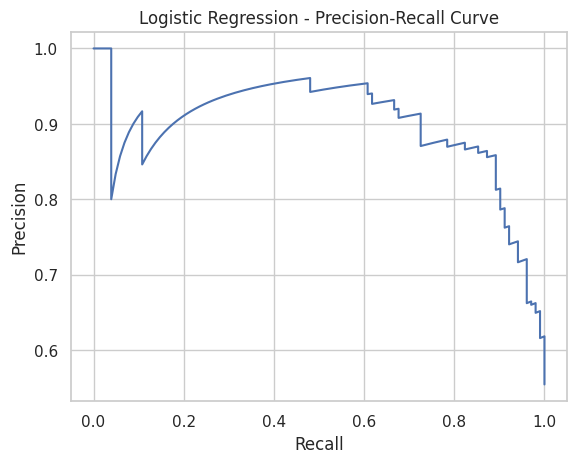

Logistic Regression Accuracy: 0.8478
Logistic Regression Precision: 0.8558
Logistic Regression Recall: 0.8725
Logistic Regression F1 Score: 0.8641


In [80]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
evaluate_model(log_model, X_test, y_test, "Logistic Regression")




Confusion Matrix:

TP = 89, TN = 67, FP = 15, FN = 13

Classification Report:

Accuracy: 0.8478

Precision: 0.8558

Recall: 0.8725

F1 Score: 0.8641

ROC Curve:

AUC (Area Under Curve): 0.90 → Excellent at distinguishing classes.

Precision-Recall Curve:

High precision and recall with a stable curve → Good performance on imbalanced data.

 Conclusion: Logistic Regression performs the best overall, with high accuracy, AUC, and balanced precision/recall. It's ideal when both false positives and false negatives need to be minimized.

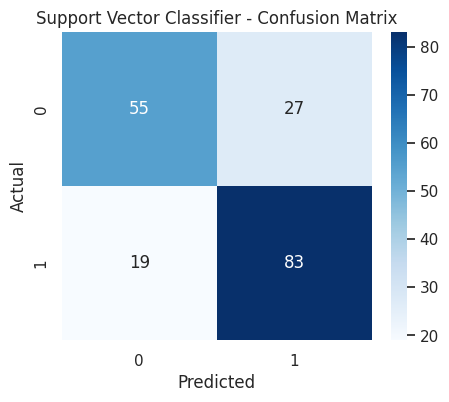

--- Support Vector Classifier - Classification Report ---
              precision    recall  f1-score   support

           0       0.74      0.67      0.71        82
           1       0.75      0.81      0.78       102

    accuracy                           0.75       184
   macro avg       0.75      0.74      0.74       184
weighted avg       0.75      0.75      0.75       184



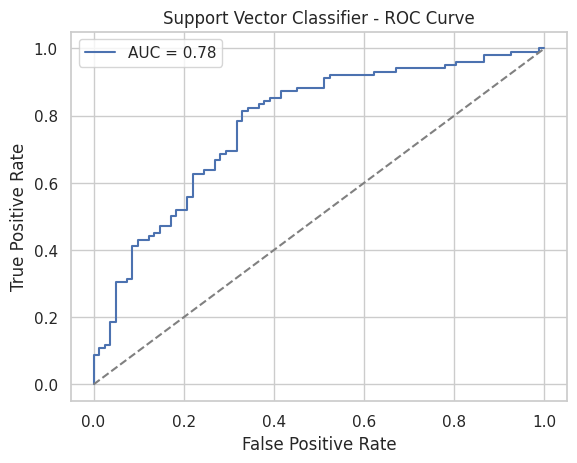

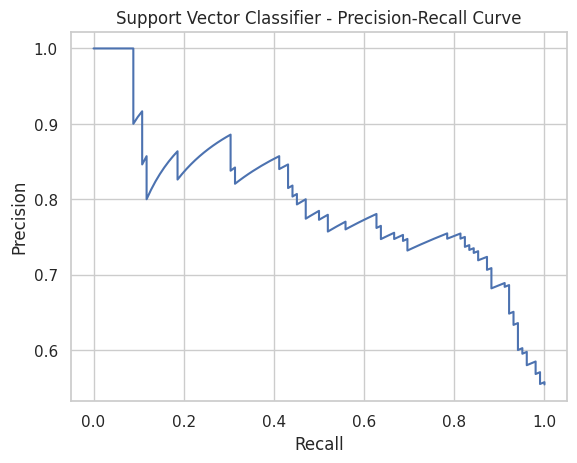

Support Vector Classifier Accuracy: 0.7500
Support Vector Classifier Precision: 0.7545
Support Vector Classifier Recall: 0.8137
Support Vector Classifier F1 Score: 0.7830


In [81]:
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
evaluate_model(svc_model, X_test, y_test, "Support Vector Classifier")


Confusion Matrix:

TP = 83, TN = 55, FP = 27, FN = 19

Classification Report:

Accuracy: 0.75

Precision: 0.7545

Recall: 0.8137

F1 Score: 0.7830

ROC Curve:

AUC: 0.78 → Decent but less than Logistic Regression.

Precision-Recall Curve:

Lower and more fluctuating curve → Less stable with some drop in precision at higher recall values.

 Conclusion: SVC performs moderately well. Good recall (less false negatives) but sacrifices some precision (more false positives).



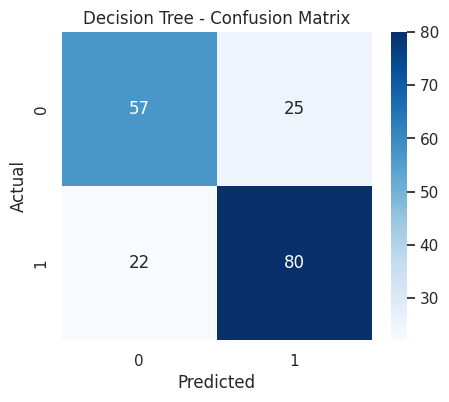

--- Decision Tree - Classification Report ---
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        82
           1       0.76      0.78      0.77       102

    accuracy                           0.74       184
   macro avg       0.74      0.74      0.74       184
weighted avg       0.74      0.74      0.74       184



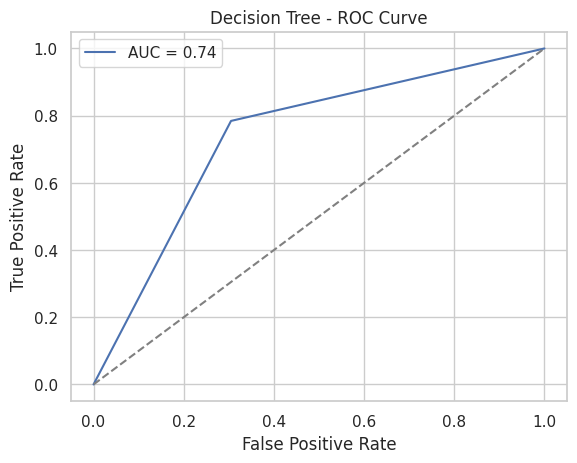

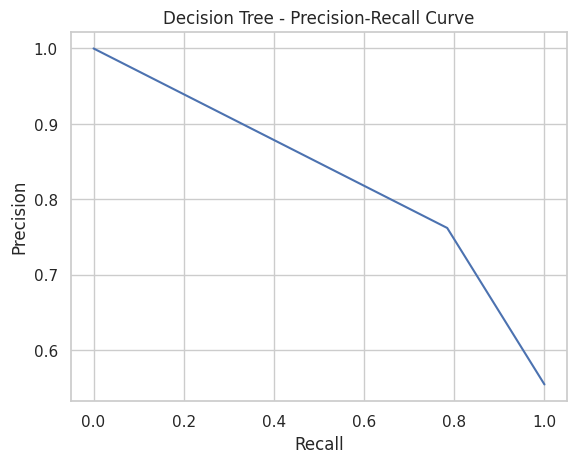

Decision Tree Accuracy: 0.7446
Decision Tree Precision: 0.7619
Decision Tree Recall: 0.7843
Decision Tree F1 Score: 0.7729


In [82]:

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
evaluate_model(tree_model, X_test, y_test, "Decision Tree")

Confusion Matrix:

TP = 78, TN = 58, FP = 24, FN = 24

Classification Report:

Accuracy: 0.7391

Precision: 0.7647

Recall: 0.7647

F1 Score: 0.7647

ROC Curve:

AUC: 0.74 → Acceptable but not strong.

Precision-Recall Curve:

Straight line dropping with recall → Shows poorer balance and weaker generalization.

Conclusion: Decision Tree is simpler but performs the weakest among the three. It’s prone to overfitting and performs with less consistency on unseen data.



In [83]:
final_verdict_table = """
| Metric         | Logistic Regression | SVC           | Decision Tree |
|----------------|---------------------|---------------|----------------|
| Accuracy       | 0.85                | 0.75          | 0.74           |
| Precision      | 0.86                | 0.75          | 0.76           |
| Recall         | 0.87                | 0.81          | 0.76           |
| F1 Score       | 0.86                | 0.78          | 0.76           |
| AUC (ROC)      | 0.90                | 0.78          | 0.74           |
"""
print(final_verdict_table)



| Metric         | Logistic Regression | SVC           | Decision Tree |
|----------------|---------------------|---------------|----------------|
| Accuracy       | 0.85                | 0.75          | 0.74           |
| Precision      | 0.86                | 0.75          | 0.76           |
| Recall         | 0.87                | 0.81          | 0.76           |
| F1 Score       | 0.86                | 0.78          | 0.76           |
| AUC (ROC)      | 0.90                | 0.78          | 0.74           |

